In [1]:
# Course: CSCI 6515
# Assignment: 3
# Date Created: 28 10 2020
# Date Last Modified: 09 11 2020
# Authors: Yahu Wang & Anqi Chen 

In [2]:
# First we convert the audio format from mp4 to wav

from pydub import AudioSegment
file_path = "scrum.mp4"
def mp4_to_wav(file):
    sound = AudioSegment.from_file(file, format="mp4")
    sound.export("scrum.wav", format="wav")
    return sound

file = mp4_to_wav(file_path)

In [3]:
import librosa

x , sr = librosa.load("scrum.wav", sr=8000)
print(x.shape, sr)

(2828934,) 8000


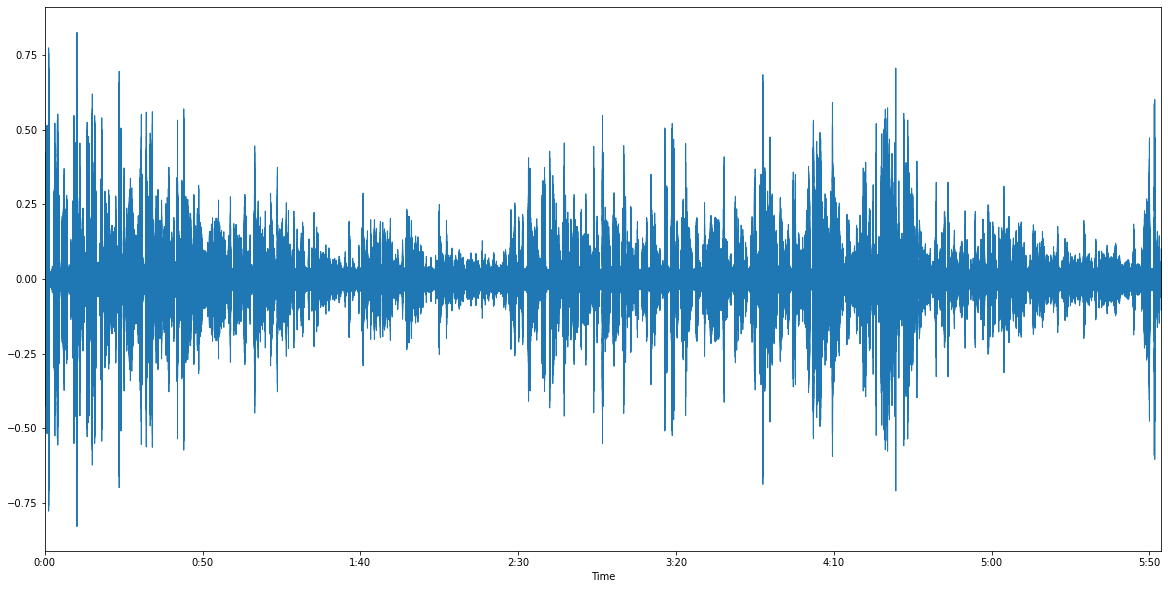

In [4]:
# Display the waveplot of audio file

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(20, 10))
librosa.display.waveplot(x, sr=sr)

In [5]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the path of audio file here
audio_file_path = 'scrum.wav'
wav_path = Path(audio_file_path)

wav = preprocess_wav(wav_path)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.02 seconds.
(4307, 256)


In [6]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=12,       # please give the number of participants here
    max_clusters=100,
    p_percentile=0.90,
    gaussian_blur_sigma=1)

labels = clusterer.predict(cont_embeds)
print(len(labels))

4307


In [7]:
# Label the start time and end time
# for each speaker

from resemblyzer import sampling_rate

def create_labelling(labels,wav_splits):
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling

labelling = create_labelling(labels,wav_splits)
print(len(labelling))

91


In [8]:
for l in labelling:
    print(l)

('1', 0, 24.8)
('4', 24.8, 25.4)
('1', 25.4, 36.2)
('4', 36.2, 37.82)
('1', 37.82, 42.62)
('4', 42.62, 42.68)
('1', 42.68, 43.16)
('4', 43.16, 56.0)
('1', 56.0, 58.34)
('3', 58.34, 70.4)
('1', 70.4, 71.18)
('0', 71.18, 76.34)
('1', 76.34, 78.2)
('2', 78.2, 78.38)
('1', 78.38, 78.5)
('2', 78.5, 93.92)
('1', 93.92, 94.04)
('10', 94.04, 101.54)
('5', 101.54, 101.66)
('10', 101.66, 102.62)
('1', 102.62, 111.44)
('11', 111.44, 111.68)
('1', 111.68, 111.98)
('11', 111.98, 112.1)
('1', 112.1, 112.34)
('11', 112.34, 112.88)
('1', 112.88, 113.24)
('11', 113.24, 120.44)
('8', 120.44, 121.7)
('11', 121.7, 122.96)
('6', 122.96, 123.38)
('11', 123.38, 123.68)
('6', 123.68, 123.8)
('1', 123.8, 126.2)
('11', 126.2, 126.56)
('1', 126.56, 126.68)
('11', 126.68, 127.1)
('1', 127.1, 128.06)
('6', 128.06, 128.24)
('1', 128.24, 129.56)
('11', 129.56, 133.7)
('1', 133.7, 134.54)
('6', 134.54, 141.2)
('11', 141.2, 142.52)
('1', 142.52, 143.54)
('8', 143.54, 144.62)
('1', 144.62, 144.8)
('11', 144.8, 144.98)


In [9]:
# Get the duration of eack speaker

Start=[]
End=[]
array=[]

for l in labelling:
    Start.append(l[1])
    End.append(l[2])


for i in range(12):
    duration=0
    for l in labelling:
        if str(i) == l[0]:
            duration+=(l[2]-l[1])
    temp=[i,duration]
    array.append(temp)

print(array)

[[0, 5.159999999999997], [1, 117.50000000000006], [2, 15.599999999999994], [3, 12.060000000000002], [4, 15.120000000000001], [5, 23.81999999999998], [6, 14.580000000000013], [7, 9.179999999999978], [8, 12.060000000000045], [9, 8.52000000000001], [10, 8.819999999999993], [11, 16.739999999999966]]


62.6	55.7


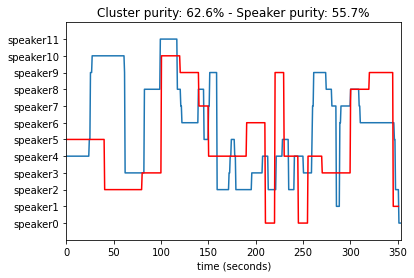

array([ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  5.,  5.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  9.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11

In [10]:
# Extract a sequence of audio segments and respective cluster labels
# In addition, the ground-truth is written in another file called "scrum.segments" - 
# Evaluation metrics are generated, the cluster purity and speaker purity are computed
# As the graph below shows, red line indicates the ground truth, blue line represents real segments

from pyAudioAnalysis import audioSegmentation as aS
aS.speaker_diarization("scrum.wav", 12, mid_window=4.0, mid_step=0.6, short_window=0.2, lda_dim=0, plot_res=True)

In [11]:
# Get the frame rate and channel number

import wave
from google.cloud import speech_v1 as speech
from google.cloud import storage
import os

def frame_rate_channel(audio_file_name):
    with wave.open(audio_file_name, "rb") as wave_file:
        frame_rate = wave_file.getframerate()
        channels = wave_file.getnchannels()
        return frame_rate,channels


In [12]:
# If the audio channel is more than a single one, 
# using this method to convert channel number into one

def stereo_to_mono(audio_file_name):
    sound = AudioSegment.from_wav(audio_file_name)
    sound = sound.set_channels(1)
    sound.export(audio_file_name, format="wav")

In [13]:
def speech_to_text(config, audio):
    client = speech.SpeechClient()
    operation = client.long_running_recognize(config=config, audio=audio)
    response = operation.result(timeout=10000)
    print_sentences(response)

In [14]:
def print_sentences(response):
    for result in response.results:
        best_alternative = result.alternatives[0]
        transcript = best_alternative.transcript
        confidence = best_alternative.confidence
        print("-" * 80)
        print(f"Transcript: {transcript}")
        print(f"Confidence: {confidence:.0%}")

In [15]:
file_name="scrum.wav"
frame_rate, channels = frame_rate_channel(file_name)

if channels > 1:
    stereo_to_mono(file_name)


In [16]:
# Print out the whole transcript with confidence

config = dict(language_code="en-AU")
audio = dict(uri="gs://scrum_audio/scrum.wav")

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/chenanqi/key.json"

speech_to_text(config, audio)

--------------------------------------------------------------------------------
Transcript: 21 gavan has come down to say yet so yesterday I was working on the on the main product page and yeah it went alright I was using the zoom effects start listening to work fine tesrol running ok it's fantastic SJ Korea know it just was going to be the performance so we can I use there's ok so I'm just a bit but I'm on that today just to make sure that they've service
Confidence: 94%
--------------------------------------------------------------------------------
Transcript: don't think I'm gonna get any blockers unless we have any sort of memory issues but the payment system with some issues with them so somebody
Confidence: 90%
--------------------------------------------------------------------------------
Transcript:  so yesterday was testing of images and survive
Confidence: 88%
--------------------------------------------------------------------------------
Transcript:  yesterday I was work

In [17]:
from google.cloud import speech_v1p1beta1 as speech

def google_transcribe(file_name):

    gcs_uri = "gs://scrum_audio/scrum.wav"
    transcript = ""

    client = speech.SpeechClient()
    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=frame_rate,
        language_code="en-AU",
        enable_speaker_diarization=True,
        diarization_speaker_count=12)

    operation = client.long_running_recognize(config=config, audio=audio)
    response = operation.result(timeout=10000)
    result = response.results[-1]
    words_info = result.alternatives[0].words

    tag=1
    speaker=""

    for word_info in words_info:
        if word_info.speaker_tag==tag:
            speaker=speaker+" "+word_info.word
        else:
            transcript += "speaker {}: {}".format(tag,speaker) + '\n'
            tag=word_info.speaker_tag
            speaker=""+word_info.word

    transcript += "speaker {}: {}".format(tag,speaker)

    return transcript

In [18]:
def write_transcripts(transcript_filename,transcript):
    f= open(transcript_filename,"w+")
    f.write(transcript)
    f.close()

In [19]:
# Write the transcript of multiple speakers 
# using Google speaker diarization
# The target file is "scrum.txt"

transcript = google_transcribe(file_name)
transcript_filename = file_name.split('.')[0] + '.txt'
write_transcripts(transcript_filename,transcript)

In [20]:
import nltk

#this method is used to find the index of a noun
#for example a list: [ VB,ADJ,NN,VB,ADJ]
#the method should return index 2 for above example

def find_NN_index(list):
    texts = nltk.pos_tag(list)
    i=0
    while i <  (len(texts)-1):
        text1 = texts[i]
        text2 = texts[i+1]

        #Case 1 : ....... NN, Not NN, .......(end of list)
        if(text1[1]=="NN" and text2[1]!="NN"):
            return i

        #Case 2:  ......., NN (end of list)
        if((i+1) == (len(texts)-1) and text2[1] == "NN"):
            #print("I am here2: " + str(i))
            return (i+1)

        i=i+1

        # loop end but not find NN
    return (0)

In [21]:
#this method combine a group of words to small sentence
def append_to_String(results):
    result = ""
    for i in range(len(results)):
        result+=results[i]
        result+=" "
    return result

In [22]:
#This method are used to create a report for a speaker about what they have done yesterday
#and their plan today
#and the issue they meet
#we cluster the speech text according to the tense of verb
def report(Line):
    work_done_list=[]
    plan_list=[]
    issue_list=[]
    for line in Line:
        text = nltk.word_tokenize(line)
        #Start to process the line
        Tag = nltk.pos_tag(text)

        i = 0
        while (i<len(Tag)):
            tag = Tag[i]
            if(tag[1] in ["VBN","VBD","VBG","MD","VB","VBZ","VBP"]):
                #do something
                textlist = text[i:]
                # for the verb in VBN and VBD, that means issue happened in the past
                # so we arrange them to work done yesterday
                if(tag[1] in ["VBN","VBD"]):
                    j = find_NN_index(textlist)
                    if(j!=0):
                        list = text[i:i+j+1]
                    else:
                        list = text[i:]
                        result = append_to_String(list)
                        work_done_list.append(result)
                        break


                    result = append_to_String(list)
                    work_done_list.append(result)
                    i=i+j
                #for the verb in future tense, we arrange them to plan to do today
                elif(tag[1] in ["VBG"] or tag[0] in ["will","Will"]):
                    j = find_NN_index(textlist)
                    if(j!=0):
                        list = text[i:i+j+1]
                    else:
                        list = text[i:]
                        result = append_to_String(list)
                        plan_list.append(result)
                        break


                    result = append_to_String(list)
                    plan_list.append(result)
                    i=i+j
                #for present tense verb, we arrange them to issue report
                elif(tag[1] in ["VB","VBZ"]):
                    j = find_NN_index(textlist)
                    if(j!=0):
                        list = text[i:i+j+1]
                    else:
                        list = text[i:]
                        result = append_to_String(list)
                        issue_list.append(result)
                        break

                    result = append_to_String(list)
                    issue_list.append(result)
                    i=i+j
                #special case: verb like am,is,are, if next word is a VBG, it is future tense.
                #otherwise, it is present tense
                elif(tag[1] in ["VBP"]):
                    tag2 = Tag[i+1]

                    j = find_NN_index(textlist)

                    if(j!=0):
                        list = text[i:i+j+1]
                    else:
                        list = text[i:]
                        result = append_to_String(list)

                        if(tag2[1]!="VBG"):
                            issue_list.append(result)
                        else:
                            plan_list.append(result)

                        break

                    result = append_to_String(list)
                    if(tag2[1]!="VBG"):
                        issue_list.append(result)
                    else:
                        plan_list.append(result)
                    i=i+j

            i = i+1


    resultList=[]
    resultList.append(work_done_list)
    resultList.append(plan_list)
    resultList.append(issue_list)
    return resultList

In [23]:
file2 = open("speaker2.txt")
Lines2 = file2.readlines()
file2.close()
for line in Lines2:
    print(line)

yesterday I was uploading images and some advertising stuff and cross-browser checks and some automated tests for regression

any problem not so far



In [24]:
report2 = report(Lines2)
print(report2[0])
print(report2[1])
print(report2[2])

['was uploading images and some advertising stuff ']
[]
[]


In [25]:
file3 = open("speaker3.txt")
Lines3 = file3.readlines()
file3.close()
for line in Lines3:
    print(line)

yes so yesterday I was working on the image zooming on the main product page and it went all right

I was using a zoom FX plugin and that seem to work fine

We did some tests against jQuery and now it just was not going to be as performant

So we are going to use the zoom FX plugin and it seems to be handling large images

I will work on that to make sure it serves okay today 

I am going to get any blockers unless we have any memory issues all is good


In [26]:
report3 = report(Lines3)
# work done yesterday
print(report3[0])
#plan to do today
print(report3[1])
#report issue
print(report3[2])

['was working on the image ', 'went all right ', 'was using a zoom ', 'did some tests against jQuery ', 'was not going to be as performant ']
['zooming on the main product page ', 'are going to use the zoom ', 'will work on that to make sure it serves okay today ', 'am going to get any blockers unless we have any memory ']
['seem to work fine ', 'seems to be handling large images ', 'is good ']


In [27]:
file4 = open("speaker4.txt")
Lines4 = file4.readlines()
file4.close()
for line in Lines4:
    print(line)

yes I was working with Jake yesterday as he just explained

and will probably be doing the same sort of stuff again tomorrow today

any problems no just like Jake said

oh yes probably will stay ahead for the rest of the week I should measure on this same as normal


In [28]:
report4 = report(Lines4)
print(report4[0])
print(report4[1])
print(report4[2])

['was working with Jake yesterday ', 'explained ', 'said ']
['will probably be doing the same sort ', 'will stay ahead for the rest ']
['measure on this same as normal ']


In [29]:
file5 = open("speaker5.txt")
Lines5 = file5.readlines()
file5.close()
for line in Lines4:
    print(line)

yes I was working with Jake yesterday as he just explained

and will probably be doing the same sort of stuff again tomorrow today

any problems no just like Jake said

oh yes probably will stay ahead for the rest of the week I should measure on this same as normal


In [30]:
report5 = report(Lines5)
print(report5[0])
print(report5[1])
print(report5[2])

['was testing the shopping basket ']
['suggesting me shoes with a different type ']
['seems to be going okay to get started says the app ', 'have to raise that to somebody ']


In [31]:
file6 = open("speaker6.txt")
Lines6 = file6.readlines()
file6.close()
for line in Lines6:
    print(line)

yesterday I was working on the main page doing frontend work some of the bugs raised I was looking into

So I have got to do more cross layer checks but I think it should be ok

basically we have some minor issues things at our place text or alignment so Util stuff


In [32]:
report6 = report(Lines6)
print(report6[0])
print(report6[1])
print(report6[2])

['was working on the main page ', 'raised I was looking into ']
['doing frontend work ']
['have got to do more cross layer ', 'think it should be ok ', 'have some minor issues things at our place text ']


In [33]:
file7 = open("speaker7.txt")
Lines7 = file7.readlines()
file7.close()
for line in Lines7:
    print(line)

yesterday finalized the design and is going well

clients asked for us change requests which is changing some of the photos 

i will do that and tidy up the wire frames


In [34]:
report7 = report(Lines7)
print(report7[0])
print(report7[1])
print(report7[2])

['finalized the design ', 'asked for us change requests which is changing some of the photos ']
['will do that and tidy up the wire ']
['is going well ']


In [35]:
file8 = open("speaker8.txt")
Lines8 = file8.readlines()
file8.close()
for line in Lines8:
    print(line)

so yesterday I was working with John Samsan Rally it was all about functionality on that We are thinking today that is going to get boring

We talked to Nicola in advertising there are some issues we are having kind of unrelated to any what we do so probably one of them could take with me as another pair we will head over there pick up some of the issues they have been without a few days



In [36]:
report8 = report(Lines8)
print(report8[0])
print(report8[1])
print(report8[2])

['was working with John Samsan Rally it was all about functionality ', 'talked to Nicola in advertising ']
['are thinking today ', 'will head over there pick up some of the issues they have been without a few days ']
['is going to get boring ', 'are some issues we are having kind ', 'do so probably one of them could take with me as another pair ']


In [37]:
file9 = open("speaker9.txt")
Lines9 = file9.readlines()
file9.close()
for line in Lines9:
    print(line)

yesterday I was working on the update cart with James

we had a reasonably good day yesterday

We are doing some overlap delete part but we are not resolve them to be honest

so there have some problems

we will carry on with its today



In [38]:
report9 = report(Lines9)
print(report9[0])
print(report9[1])
print(report9[2])

['was working on the update cart ', 'had a reasonably good day yesterday ']
['are doing some overlap delete part ', 'will carry on with its today ']
['are not resolve them to be honest ', 'have some problems ']


In [39]:
file10 = open("speaker10.txt")
Lines10 = file10.readlines()
file10.close()
for line in Lines10:
    print(line)

so I was just working on some front-end stuff yesterday and seems worked quite well

I will probably just carry on again with that today


In [40]:
report10 = report(Lines10)
print(report10[0])
print(report10[1])
print(report10[2])

['was just working on some front-end stuff yesterday ']
['will probably just carry on again with that today ']
['seems worked quite well ']


In [41]:
file12 = open("speaker12.txt")
Lines12 = file12.readlines()
file12.close()
for line in Lines12:
    print(line)

yesterday I was working on style of the delete button it was going very well actually

A few problems in IE6 are as always but it is going to finally crack by the end of the day and I am carrying on that


In [42]:
report12 = report(Lines12)
print(report12[0])
print(report12[1])
print(report12[2])

['was working on style ', 'was going very well actually ']
['am carrying on that ']
['are as always but it is going to finally crack by the end ']


In [43]:
import pandas as pd

#we create a whole report for the meeting
data = [["speaker2",report2[0],report2[1],report2[2],"13 sec"],
        ["speaker3",report3[0],report3[1],report3[2],"37 sec"],
        ["speaker4",report4[0],report4[1],report4[2],"25 sec"],
        ["speaker5",report5[0],report5[1],report5[2],"15 sec"],
        ["speaker6",report6[0],report6[1],report6[2],"19 sec"],
        ["speaker7",report7[0],report7[1],report7[2],"24 sec"],
        ["speaker8",report8[0],report8[1],report8[2],"34 sec"],
        ["speaker9",report9[0],report9[1],report9[2],"82 sec"],
        ["speaker10",report10[0],report10[1],report10[2],"13 sec"],
        ["speaker12",report12[0],report12[1],report12[2],"14 sec"],
       ]
df = pd.DataFrame(data,columns=['speaker','work done yesterday','plan to do','report issue','  duration of talk'])
print(df)


     speaker                                work done yesterday  \
0   speaker2  [was uploading images and some advertising stu...   
1   speaker3  [was working on the image , went all right , w...   
2   speaker4  [was working with Jake yesterday , explained ,...   
3   speaker5                 [was testing the shopping basket ]   
4   speaker6  [was working on the main page , raised I was l...   
5   speaker7  [finalized the design , asked for us change re...   
6   speaker8  [was working with John Samsan Rally it was all...   
7   speaker9  [was working on the update cart , had a reason...   
8  speaker10  [was just working on some front-end stuff yest...   
9  speaker12  [was working on style , was going very well ac...   

                                          plan to do  \
0                                                 []   
1  [zooming on the main product page , are going ...   
2  [will probably be doing the same sort , will s...   
3       [suggesting me shoes with a di